In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
dataset = input_data.read_data_sets('MNIST/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
dataset.train.images.shape

(55000, 784)

In [4]:
img_1 = dataset.train.images[0]

In [5]:
img_1.shape

(784,)

In [6]:
img_1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
img_1 = img_1.reshape(28,28)

In [8]:
import matplotlib.pyplot as plt

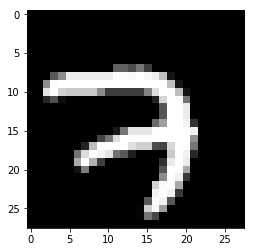

In [9]:
plt.imshow(img_1, cmap='gray')
plt.show()

In [10]:
def init_weight(shape):
    initRandomWeights = tf.random_normal(shape, stddev=0.1)
    return tf.Variable(initRandomWeights)

def init_bias(shape):
    bias = tf.constant(0.1, shape=shape)
    return tf.Variable(bias)

def conv2d(x,w):
#     x - [batch, H, W, Channels]
#     w - [filter h, filter w, channel In, channel Out]
    return tf.nn.conv2d(x,w,strides=[1,1,1,1], padding='SAME')

def max_pooling(x):
#     ksize - size of the window for each dimension of the input tensor
#     - [1,h,w,channel]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

def conv_layer(input_x, shape):
    W = init_weight(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W) + b)

In [11]:
def fully_connected(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weight([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer,W) + b

In [12]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [13]:
y = tf.placeholder(tf.float32, shape=[None,10])

In [14]:
# we use -1 when we do not care about number of rows and 28 by 28 is size of image
x_image = tf.reshape(x, [-1, 28,28,1])

In [15]:
x_image.shape

TensorShape([Dimension(None), Dimension(28), Dimension(28), Dimension(1)])

In [16]:
# 6 by 6 is the size of filter
# 1 is input channel
# 32 is output channel
conv_1 = conv_layer(x_image, shape = [6,6,1,32])
convMaxPooling = max_pooling(conv_1)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
# 6 by 6 is the size of filter
# 32 is input channel because of previous conv_layer output
# 64 is output channel
conv_2 = conv_layer(convMaxPooling, shape=[6,6,32,64])
convMaxPooling_2 = max_pooling(conv_2)

In [18]:
# we use 7 by 7 image because we did 2 pooling layers - (28/2)/2 = 7
# 64 came from the output of previous covolution
conv_flatten = tf.reshape(convMaxPooling_2, [-1,7*7*64])
full_layer = tf.nn.relu(fully_connected(conv_flatten, 1024))

In [19]:
hold_prob = tf.placeholder(tf.float32)
full_dropout = tf.nn.dropout(full_layer, keep_prob=hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
y_pred = fully_connected(full_dropout, 10)

In [21]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=y_pred))

In [22]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [23]:
init = tf.global_variables_initializer()

In [ ]:
epochs = 5000

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(epochs):
#         we fetch 50 images at a time
        batch_x, batch_y = dataset.train.next_batch(50)
#     we pass 50 images data to x and y and set dropout probability at 0.5
        sess.run(train, feed_dict = {x:batch_x, y:batch_y, hold_prob:0.5})
        
        if i%100 == 0:
            print("Currently on step : {}".format(i))
            print("Accuracy is :")
#             now compare indexs of y_prediction and y_actual...whether they have same value or not
            matches = tf.equal(tf.arg_max(y_pred,1), tf.arg_max(y,1))
#             now matches gives result as true and false
#             convert true and false to 1 and 0 and compute accuracy
            accuracy = tf.reduce_mean(tf.cast(matches, tf.float32))
#             Now to test the accuracy we pass test data to x and y
            print(sess.run(accuracy, feed_dict = {x:dataset.test.images,y:dataset.test.labels, hold_prob:1.0}))
            print("------------")

Currently on tep : 0
Accuracy is :
0.0656
------------
Currently on tep : 100
Accuracy is :
0.8499
------------
Currently on tep : 200
Accuracy is :
0.9082
------------
Currently on tep : 300
Accuracy is :
0.9182
------------
Currently on tep : 400
Accuracy is :
0.933
------------
Currently on tep : 500
Accuracy is :
0.9377
------------
Currently on tep : 600
Accuracy is :
0.9487
------------
Currently on tep : 700
Accuracy is :
0.9506
------------
Currently on tep : 800
Accuracy is :
0.9531
------------
Currently on tep : 900
Accuracy is :
0.9564
------------
Currently on tep : 1000
Accuracy is :
0.9587
------------
Currently on tep : 1100
Accuracy is :
0.9611
------------
Currently on tep : 1200
Accuracy is :
0.9649
------------
Currently on tep : 1300
Accuracy is :
0.9648
------------
Currently on tep : 1400
Accuracy is :
0.9653
------------
Currently on tep : 1500
Accuracy is :
0.9677
------------
Currently on tep : 1600
Accuracy is :
0.9687
------------
Currently on tep : 1700
Acc